In [12]:
import pandas as pd
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt

## Network Initialization

In [13]:
adjacency = pd.DataFrame(
    np.array([[1, 1, 1, 1, 0],
              [1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1],
              [0, 1, 1, 1, 1]]),
    columns=['1', '2', '3', '4', '5'],
    index=['1', '2', '3', '4', '5']
)
adjacency

,1,2,3,4,5
1,1,1,1,1,0
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1
5,0,1,1,1,1


## Discretize the probability density functions of all edges

In [14]:
# Create range [0, T] with T = 4 to discretize our range of time when generating gamma distributions
x = np.linspace(0, 4, 4001)

# Create alpha and scale parameters for each edge
gammaParams = pd.DataFrame(
    columns=['1', '2', '3', '4', '5'],
    index=['1', '2', '3', '4', '5']
)
gammaParams.loc['1', '2'] = gammaParams.loc['2', '1'] = (1, 1)
gammaParams.loc['1', '3'] = gammaParams.loc['3', '1'] = (2, 2)
gammaParams.loc['1', '4'] = gammaParams.loc['4', '1'] = (2, 2)
gammaParams.loc['2', '3'] = gammaParams.loc['3', '2'] = (2, 2)
gammaParams.loc['2', '4'] = gammaParams.loc['4', '2'] = (1, 2)
gammaParams.loc['2', '5'] = gammaParams.loc['5', '2'] = (1, 1)
gammaParams.loc['3', '4'] = gammaParams.loc['4', '3'] = (2, 1)
gammaParams.loc['3', '5'] = gammaParams.loc['5', '3'] = (1, 2)
gammaParams.loc['4', '5'] = gammaParams.loc['5', '4'] = (2, 1)

# Create gamma distributions for each edge
gammaDistributions = pd.DataFrame(
    columns=['1', '2', '3', '4', '5'],
    index=['1', '2', '3', '4', '5']
)
for startNode in gammaDistributions.index:
    for endNode in gammaDistributions.columns:
        if gammaParams.loc[startNode, endNode] is np.nan:
            continue
        alpha, beta = gammaParams.loc[startNode, endNode]
        gammaDistributions.loc[startNode, endNode] = gamma.pdf(x, alpha, scale=1/beta)

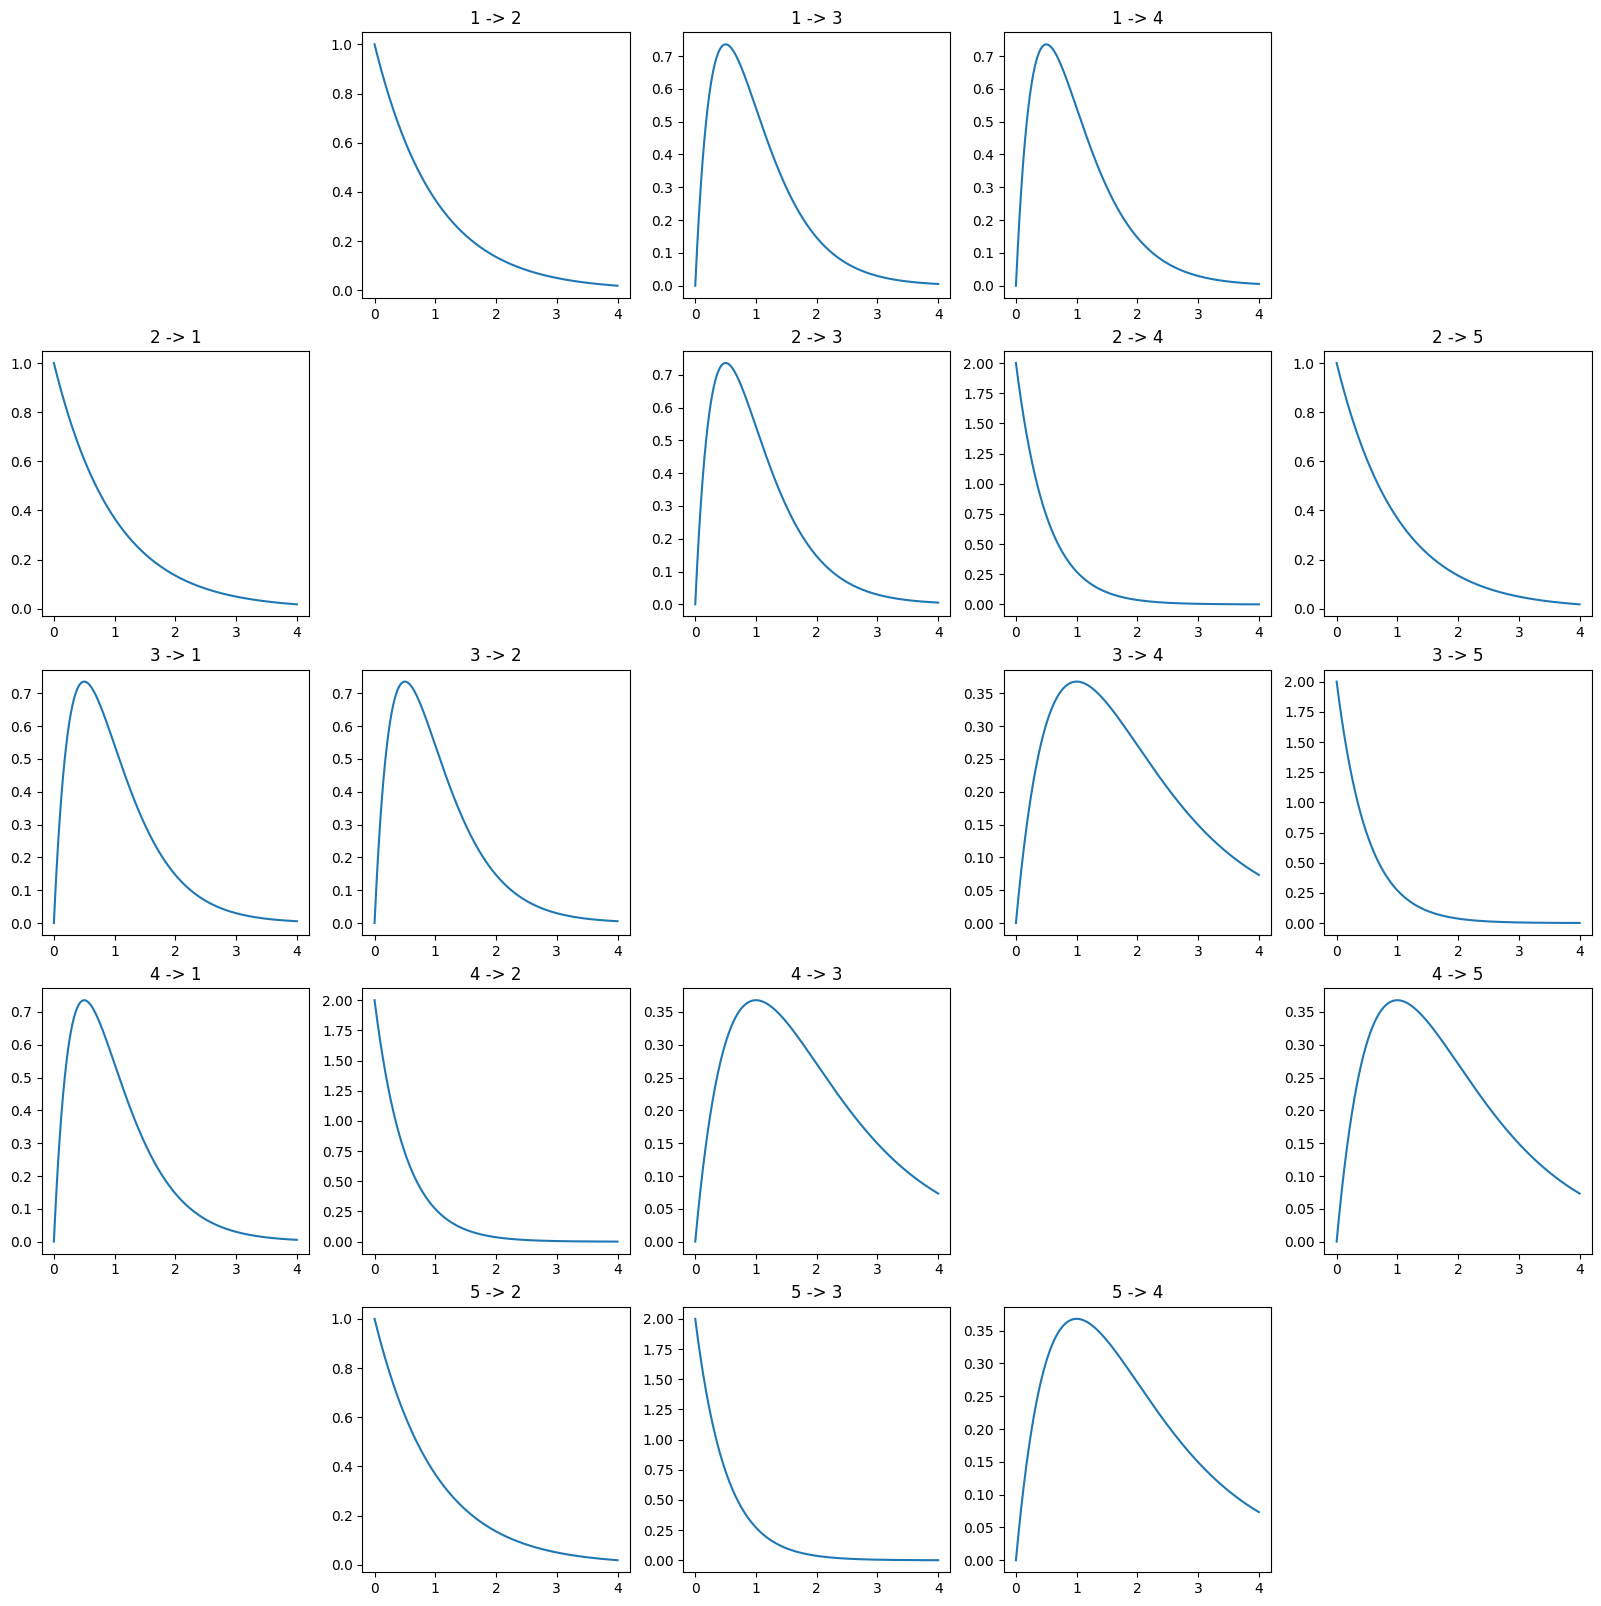

In [ ]:
# Plot gamma distributions for the heck of it
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
for i, startNode in enumerate(gammaDistributions.index):
    for j, endNode in enumerate(gammaDistributions.columns):
        if i == j or gammaDistributions.loc[startNode, endNode] is np.nan:
            axs[i, j].axis('off')
            continue
        axs[i, j].plot(x, gammaDistributions.loc[startNode, endNode])
        axs[i, j].set_title(f'{startNode} -> {endNode}')

## Generate optimal probabilities and optimal policy tables

In [ ]:
probabilities = pd.DataFrame(
    columns= np.linspace(0, 4, 4001),
    index=['1', '2', '3', '4', '5']
)

probabilities.loc['1', 0] = probabilities.loc['2', 0] = probabilities.loc['3', 0] = probabilities.loc['4', 0] = 0
probabilities.loc['5',] = 1

policy = pd.DataFrame(
    columns= np.linspace(0, 4, 4001),
    index=['1', '2', '3', '4', '5']
)

for timeBudget in np.linspace(0, 4, 4001):
    if timeBudget == 0:
        continue
    for startNode in ['1', '2', '3', '4']:
        tempProbabilities = pd.Series(index=['1', '2', '3', '4', '5'])
        for endNode in ['1', '2', '3', '4', '5']:
            if adjacency.loc[startNode, endNode] == 1:
                # tempProbabilities[endNode] = np.sum(probabilities.loc[endNode, timeBudget - x] * gammaDistributions.loc[endNode, startNode])
        probabilities.loc[startNode, timeBudget] = np.nanmax(tempProbabilities)

## Simulation